In [3]:
def do():
    def plot_predictions(ax, predictions, title, colors):
        labels = [pred['label'] for pred in predictions]
        scores = [pred['score'] for pred in predictions]

        bars = ax.bar(labels, scores, color=colors)
        ax.set_xlabel('Genre')
        ax.set_ylabel('Confidence Score')
        ax.set_title(title)
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=45)

        for bar, score in zip(bars, scores):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

        ax.legend([title])

    # Define distinct colors for each plot
    colors_list = [
        ['lightsteelblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'],
        ['lightseagreen', 'lightgoldenrodyellow', 'lightgray']
    ]
    
    # Example usage
    # file_paths = [
    #     ('/home/scur0997/danilo/gtzan/genres/blues/blues.00002.wav', 'Blues Prediction'),
    #     ('/home/scur0997/danilo/gtzan/genres/disco/disco.00005.wav', 'Disco Prediction')
    # ]
    file_paths = [('C:/Users/HP/Downloads/genres_original/blues/blues.00002.wav', 'Blues Prediction'),
                  ('C:/Users/HP/Downloads/genres_original/disco/disco.00005.wav', 'Disco Prediction')]

    fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

    for ax, (file_path, title), colors in zip(axes, file_paths, colors_list):
        # Get the prediction
        prediction = pipe(file_path)

        # Print the prediction
        print(prediction)

        # Plot the prediction
        plot_predictions(ax, prediction, title, colors)

    plt.show()  

Some weights of the model checkpoint at danilotpnta/HuBERT-Genre-Clf were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at danilotpnta/HuBERT-Genre-Clf and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

ValueError: ffmpeg was not found but is required to load audio files from filename

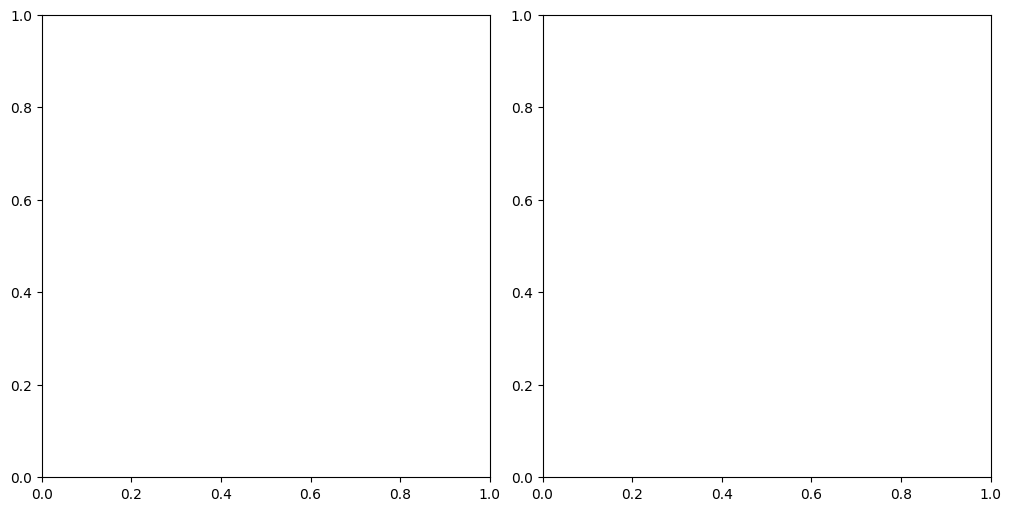

In [4]:
import numpy as np
from transformers import pipeline
import matplotlib.pyplot as plt

# Load the model and feature extractor
model_name = "danilotpnta/HuBERT-Genre-Clf"
pipe = pipeline("audio-classification", model=model_name)
do()

In [6]:
# find the genre probabilities for all audio files from the genre folder
import os
from transformers import pipeline

# Load the model and feature extractor
model_name = "danilotpnta/HuBERT-Genre-Clf"
pipe = pipeline("audio-classification", model=model_name)

genre_probs = {}

for root, dirs, files in os.walk('C:/Users/HP/Downloads/genres_original'):
    for file in files:
        if file.endswith('.wav'):
            audio_path = os.path.join(root, file)
            try:
                prediction = pipe(audio_path)
                print(f"{audio_path}: {prediction}")
                genre_probs[audio_path] = prediction
            except Exception as e:
                print(f"Error processing {audio_path}: {e}")
                continue

print(genre_probs)

Some weights of the model checkpoint at danilotpnta/HuBERT-Genre-Clf were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at danilotpnta/HuBERT-Genre-Clf and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

Error processing C:/Users/HP/Downloads/genres_original\blues\blues.00000.wav: ffmpeg was not found but is required to load audio files from filename
Error processing C:/Users/HP/Downloads/genres_original\blues\blues.00001.wav: ffmpeg was not found but is required to load audio files from filename
Error processing C:/Users/HP/Downloads/genres_original\blues\blues.00002.wav: ffmpeg was not found but is required to load audio files from filename
Error processing C:/Users/HP/Downloads/genres_original\blues\blues.00003.wav: ffmpeg was not found but is required to load audio files from filename
Error processing C:/Users/HP/Downloads/genres_original\blues\blues.00004.wav: ffmpeg was not found but is required to load audio files from filename
Error processing C:/Users/HP/Downloads/genres_original\blues\blues.00005.wav: ffmpeg was not found but is required to load audio files from filename
Error processing C:/Users/HP/Downloads/genres_original\blues\blues.00006.wav: ffmpeg was not found but is 

KeyboardInterrupt: 